In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("suffled3.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-07-28,306.637012,308.326758,304.181926,304.480103,2116300,0.0,0.0
1,2015-09-17,89.160056,91.267558,89.140805,89.698959,4627000,0.0,0.0
2,2021-07-12,374.526799,375.595456,371.610470,375.086090,2648300,0.0,0.0
3,2017-03-17,109.891268,110.524228,109.803631,109.871796,4119200,0.0,0.0
4,2007-08-22,13.291884,13.592761,13.205919,13.532025,26579000,0.0,0.0


In [ ]:
df2 = pd.read_csv("suffled3.csv", parse_dates=['Date'], index_col='Date')
df2.sort_index(inplace=True,ascending=False)
df2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-11,353.950012,354.880005,346.899994,347.149994,2766800,0.00,0.0
2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700,0.00,0.0
2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0
2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0


In [ ]:
df2.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


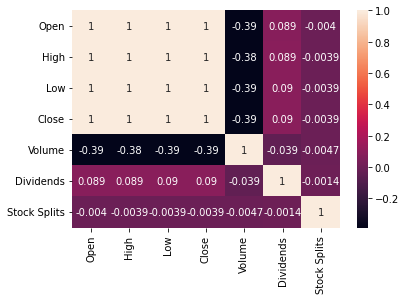

In [ ]:
sns.heatmap(df2.corr(), annot=True)

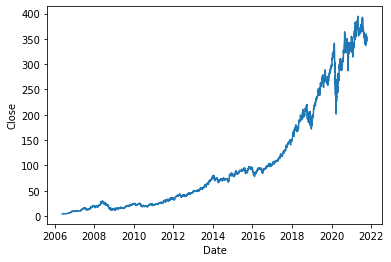

In [ ]:
sns.lineplot(data=df2, x=df2.index, y='Close')

In [ ]:
df2 = df2[['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']]

In [ ]:
X = df2.iloc[:,:].values
y = df2.iloc[:].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict= LR_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


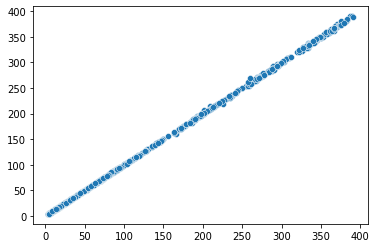

In [ ]:
ax = sns.scatterplot(y_test, y_predict)
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print("MSE LinearRegression: ", metrics.mean_squared_error(y_test, y_predict))
print("MAPE LinearRegression: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
print("MAE LinearRegression: ", metrics.mean_absolute_error(y_test, y_predict))
print("RMSE RidgeRegression: ", metrics.r2_score(y_test, y_predict))

MSE LinearRegression:  1.0448009861638057
MAPE LinearRegression:  0.005997086918229139
MAE LinearRegression:  0.5171913074899896
RMSE RidgeRegression:  0.9999072042062204


## 2- write run postgress docker command and save y predicted labeles with datatime in database

docker run --name postgres -e POSTGRES_DB=ml -e POSTGRES_USER=pouya -e POSTGRES_PASSWORD=1382 -p 5432:5432 -v /data:/var/lib/postgresql/data -d postgres

In [ ]:
import psycopg2
import psycopg2.extras
import pandas as pd

In [ ]:
conn = psycopg2.connect( 
    host="localhost",
    database="ml",
    user="pouya",
    password="1382")


cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
cur.execute("y_predict")
conn.commit()

## Supervised vs unsupervised


supervised = The supervised learning approach in ML uses labeled datasets that train algorithms to classify data or predict outputs precisely

unsupervised = With unsupervised learning, ML algorithms are used to examine and group unlabeled datasets

## what is Semisupevised


is a learning problem that involves a small number of labeled examples and a large number of unlabeled examples

is a type of machine learning that sits between supervised and unsupervised learning

## what is the effect of Learning rate low and up


learning rate   up = همگرا نشدن مدل

learning rate low = underfit/The model is not optimized

## instance base vs model based

Instance Based Learning :
A system is called to be learning by instance when it learns by heart from the data provided to it and thus generalizes or predicts on the basis of some similarity measure or similar feature that it found occurring on every data or some data

Model Based Learning :
A system is called model based when it learns from the data and creates a model, which has some parameters and it predicts the output by using this data trained model

## Data is more important or algorithm

Data




## what is the meaning of Overfit and underfit and what can we do if they happen?


Overfitting refers to a model that models the training data too well.
Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data

Underfitting refers to a model that can neither model the training data nor generalize to new data.
An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data

## روش های گرادیان دیسنت چیست؟


bach

mini bach

stochastic